# Finding the Best Markets to Advertise in

An **e-learning company** offers courses on programming. Most of the courses are on web and mobile development, but some also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. **Our goal in this project is to find out the two best markets to advertise our product in.**

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from numpy import std, mean

### Reading Data

In [2]:
survey=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
pd.set_option('display.max_columns', None)
print(survey.shape)
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Data Cleaning/Trimming

In [4]:
value_cols={}
for col in survey.columns:
    if survey[col].notna().sum() > 5000:
        value_cols[col]=survey[col].notna().sum()
        
value_cols

{'Age': 15367,
 'AttendedBootcamp': 17709,
 'CityPopulation': 15354,
 'CommuteTime': 9246,
 'CountryCitizen': 15382,
 'CountryLive': 15336,
 'EmploymentField': 8116,
 'EmploymentStatus': 14345,
 'ExpectedEarning': 7200,
 'Gender': 15454,
 'HasDebt': 15291,
 'HasFinancialDependents': 15329,
 'HasHighSpdInternet': 15380,
 'HasHomeMortgage': 6397,
 'HasServedInMilitary': 15256,
 'HasStudentDebt': 6402,
 'HoursLearning': 16714,
 'ID.x': 18175,
 'ID.y': 15743,
 'Income': 7623,
 'IsEthnicMinority': 15293,
 'IsReceiveDisabilitiesBenefits': 15222,
 'IsSoftwareDev': 18068,
 'IsUnderEmployed': 9223,
 'JobApplyWhen': 8138,
 'JobPref': 13483,
 'JobRelocateYesNo': 6503,
 'JobRoleInterest': 6992,
 'JobWherePref': 8118,
 'LanguageAtHome': 15344,
 'MaritalStatus': 15335,
 'MoneyForLearning': 16577,
 'MonthsProgramming': 17084,
 'NetworkID': 18175,
 'Part1EndTime': 18175,
 'Part1StartTime': 18175,
 'Part2EndTime': 15743,
 'Part2StartTime': 15743,
 'ResourceCodecademy': 9390,
 'ResourceFCC': 13803,
 'Re

In [5]:
imp_cols=['Age','CountryLive','Gender','MoneyForLearning','MonthsProgramming',
          'JobPref','JobRoleInterest','ID.x']
data=survey[imp_cols]
print(data.shape)
data.head()

(18175, 8)


,Age,CountryLive,Gender,MoneyForLearning,MonthsProgramming,JobPref,JobRoleInterest,ID.x
0,27.0,Canada,female,150.0,6.0,start your own business,NaN,02d9465b21e8bd09374b0066fb2d5614
1,34.0,United States of America,male,80.0,6.0,work for a nonprofit,Full-Stack Web Developer,5bfef9ecb211ec4f518cfc1d2a6f3e0c
2,21.0,United States of America,male,1000.0,5.0,work for a medium-sized company,"Front-End Web Developer, Back-End Web Develo...",14f1863afa9c7de488050b82eb3edd96
3,26.0,Brazil,male,0.0,5.0,work for a medium-sized company,"Front-End Web Developer, Full-Stack Web Deve...",91756eb4dc280062a541c25a3d44cfb0
4,20.0,Portugal,female,0.0,24.0,work for a multinational corporation,"Full-Stack Web Developer, Information Security...",aa3f061a1949a90b27bef7411ecd193f


## Observations

### Survey Participants' Field/s of Interest

In [6]:
interests=data['JobRoleInterest'].value_counts(normalize=True)*100

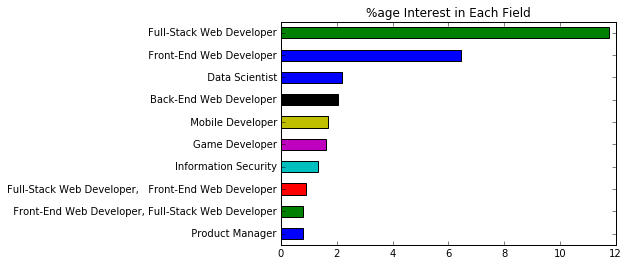

In [7]:
%matplotlib inline
interests.head(10).sort_values().plot.barh(title='%age Interest in Each Field')

In [8]:
import re
field_interest=data['JobRoleInterest'].dropna()
pattern=r'[WG]'
fields=[]
for field in field_interest:
    if re.findall(pattern, field):
        fields.append(field)    
print("There are total {} survey participants who are interested in Web Development, or Mobile Development, or both.".format(len(fields)))    

There are total 6042 survey participants who are interested in Web Development, or Mobile Development, or both.


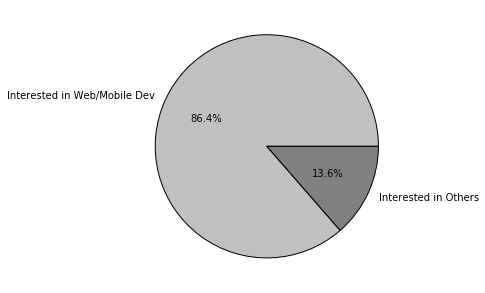

In [9]:
pd.Series((len(fields),(len(field_interest)-len(fields))),
          index=['Interested in Web/Mobile Dev',
                 'Interested in Others']).plot.pie(colors=(['silver','grey']),
                                                  autopct='%1.1f%%',
                                                   figsize=(5,5))
plt.ylabel('')
plt.show()